# Introdução

    A analise a seguir tem como objetivo obter informações sobre a necessidade de auxílio por parte dos aposentados, em comparação com os não aposentados, para observar as diferenças entre os dois grupos; e, após esse processo, entender por que tal auxílio aos aposentados é necessário ou não, discutindo a atual eficiência do fundo de previdência quando se trata da cobertura total de gastos

In [274]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [275]:
print('Diretório:')
print(os.getcwd())

Diretório:
C:\Users\trcar\Desktop\Insper\2º Semestre\Ciência dos dados\Github\Projetos\CD\Projeto1


In [276]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [277]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [278]:
dados = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
n = dados.shape[0]

In [279]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [280]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [281]:
dados.columns = estrutura.Coluna

In [282]:
dados.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [283]:
# UF
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')

#dados.REGIAO = dados.UF


In [284]:
# Idade
dados.V8005 = dados.V8005.astype('float')


In [291]:
# Aposentados
dados.APOSENT = dados.V9122
dados.V9122 = dados.V9122.astype('category')
dados.V9122.cat.categories = ('Aposentado', 'Não_aposentado')

dados.APOSENT[(dados.V9122 == 'Aposentado')] = "Aposentado"
dados.APOSENT[(dados.V9122 == 'Não_aposentado')] = "Não_aposentado"

C:\Users\trcar\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\trcar\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Tratamento de dados em relção ao auxílio recebido

### Variável Auxílio Moradia (V9043)

In [292]:
# Auxílio moradia
dados.V9043 = dados.V9043.astype('category')
dados.V9043.cat.categories = ('Sim', 'Não')

In [293]:
print('População que recebeu auxílio moradia:')
tcam=pd.crosstab(dados.V9043,dados.V9122,rownames=['Auxílio'], colnames=['Aposentado'])
tcam = tcam.fillna(0)
tcam

População que recebeu auxílio moradia:


Aposentado,Aposentado,Não_aposentado
Auxílio,,
Sim,4737,162
Não,111722,2674


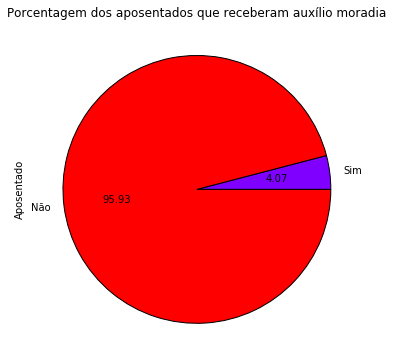

In [294]:
tcam.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

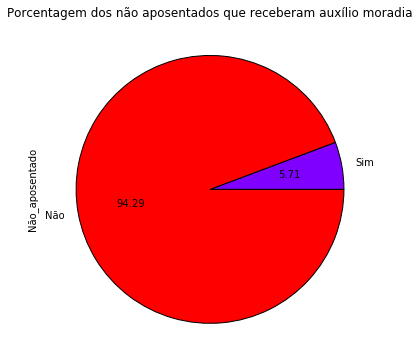

In [295]:
tcam.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão
    
    A variável mostra que, comparando aposentados com não aposentados, a porcentagem do primeiro grupo que necessita de auxílio moradia é maior do que a do segundo grupo; revelando que, nesse quesito, os aposetados estão em uma condição pior do que os não aposentados.

### Variável Auxílio Alimentação (V9044)

In [296]:
dados.V9044 = dados.V9044.astype('category')
dados.V9044.cat.categories = ('Sim', 'Não')

In [297]:
print('População que recebeu auxílio alimentação:')
tcaa=pd.crosstab(dados.V9044,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcaa = tcaa.fillna(0)
tcaa

População que recebeu auxílio alimentação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,51912,1136
Não,64547,1700


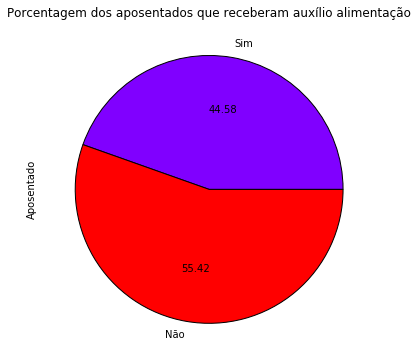

In [298]:
tcaa.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

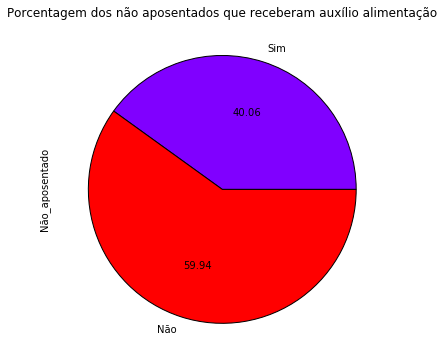

In [299]:
tcaa.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Ja de acordo com os resultados relevantes ao auxílio alimentação, é visível que os aposentados estão em uma situação melhor que os não aposentados; visto que este grupo possui uma maior porcentagem de beneficiados pelo auxílio do que o anterior.

### Variável Auxílio Transporte (V9045)

In [300]:
dados.V9045 = dados.V9045.astype('category')
dados.V9045.cat.categories = ('Sim', 'Não')

In [301]:
print('População que recebeu auxílio transporte:')
tcat=pd.crosstab(dados.V9045,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcat = tcat.fillna(0)
tcat

População que recebeu auxílio transporte:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,47880,828
Não,68579,2008


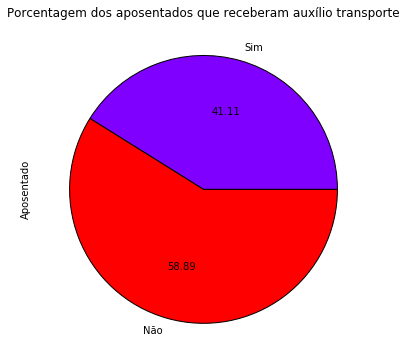

In [302]:
tcat.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

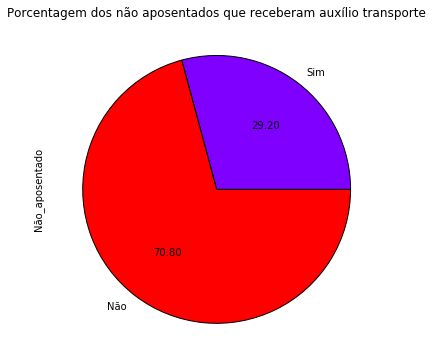

In [303]:
tcat.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    A variável auxílio transporte revela que, os não aposentados possuem uma maior necessidade de auxílio transporte do que os aposentados; portanto, este grupo apresenta uma melhor situação do que aquele.

### Variável Auxílio Educação (V9046)

In [304]:
dados.V9046 = dados.V9046.astype('category')
dados.V9046.cat.categories = ('Sim', 'Não')

In [305]:
print('População que recebeu auxílio educação:')
tcae=pd.crosstab(dados.V9046,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcae = tcae.fillna(0)
tcae

População que recebeu auxílio educação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,2928,42
Não,113531,2794


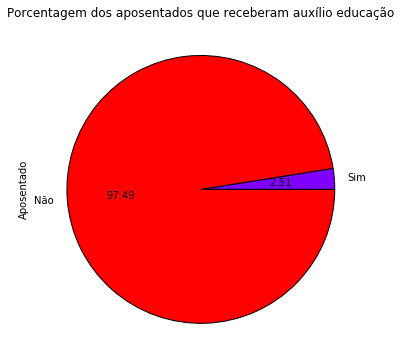

In [306]:
tcae.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

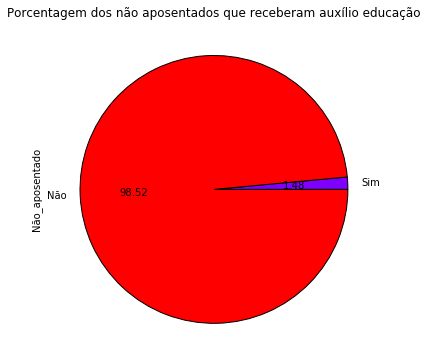

In [307]:
tcae.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Na variável auxílio educaçaõ é visto que a porcentagem de não idosos que necessitam de auxílio educação é maior que a de não idosos; revelando que o primeiro grupo está pior que o segundo grupo nesse quesito.

### Variável Auxílio Saúde (V9047)

In [308]:
# Auxílio saúde
dados.V9047 = dados.V9047.astype('category')
dados.V9047.cat.categories = ('Sim', 'Não')

In [309]:
print('População que recebeu auxílio saúde:')
tcas=pd.crosstab(dados.V9047,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcas = tcas.fillna(0)
tcas

População que recebeu auxílio saúde:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,21864,591
Não,94595,2245


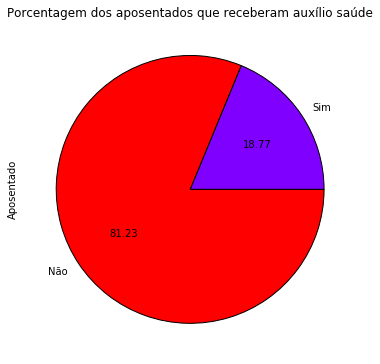

In [310]:
tcas.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

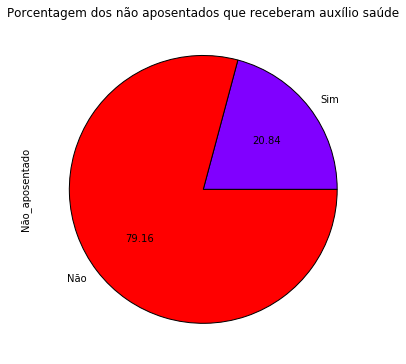

In [311]:
tcas.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Por fim, a variável auxílio saúde mostra que a porcentagem de aposentados que necessitam desse auxílio é muito maior do que a porcentagem dos não idosos; ou seja, nesse quesito os aposentados estão em uma situação mais precária que os não aposentados.

### Conclusão das variáveis relacionadas ao auxílio recebido

    Após a análise das cinco variáveis, obtem-se que em apenas duas os aposentados apresentaram uma condição pior que os não aposentados sendo essas auxílio moradia e auxílio saúde. 
    
    Mas independente desse resultado é visível uma falha dentro do sistema de previdência, pois uma renda atribuída a um cidadão aposentado teóricamente deveria ser suficiente para suprir todas as suas necessidades básicas; mas, ainda sim, todas as variáveis apresentaram uma parcela da população de aposentados que necessita de algum auxílio.

### Análise variável renda per capita

#### Renda per capita 2014

In [312]:
dados.V4750 = dados.V4750.astype('float')

In [313]:
renda = dados.V4750
faixas_renda = range(0,20000, 1000)
classe = pd.cut(renda, faixas_renda)
classe.value_counts()

(0, 1000]         247915
(1000, 2000]       63458
(2000, 3000]       16032
(3000, 4000]        7264
(4000, 5000]        3818
(5000, 6000]        2237
(6000, 7000]        1463
(7000, 8000]         914
(8000, 9000]         669
(9000, 10000]        539
(10000, 11000]       287
(11000, 12000]       234
(12000, 13000]       225
(14000, 15000]       139
(13000, 14000]       134
(15000, 16000]        92
(16000, 17000]        67
(17000, 18000]        49
(18000, 19000]        39
Name: V4750, dtype: int64

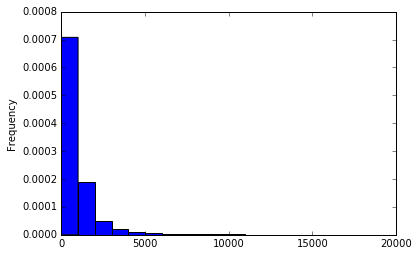

In [314]:
intervalo_renda = np.arange(0, 20000, 1000)
renda = renda.fillna(0)
histograma2 = renda.plot.hist(bins=intervalo_renda, normed=1)

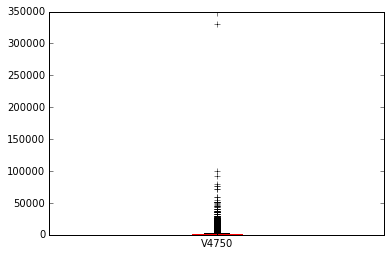

In [315]:
renda = renda[renda != 999999999999]
renda.plot.box()

In [316]:
renda.describe()

count    350190.00000
mean       1016.16314
std        1658.19055
min           0.00000
25%         344.00000
50%         635.00000
75%        1100.00000
max      331200.00000
Name: V4750, dtype: float64

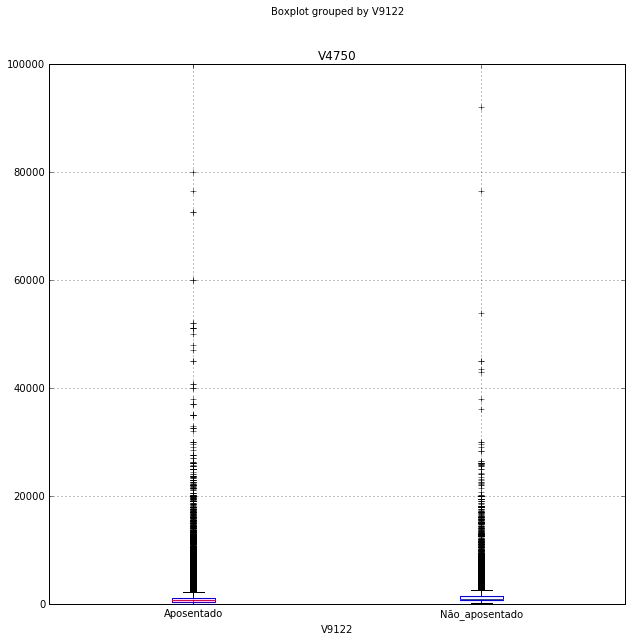

In [348]:
dados[dados.V4750 < 300000].boxplot(column= "V4750", by="V9122", figsize=(10,10))

In [319]:
rendaf = dados[(dados.V9122 == 'Aposentado') & (renda)]
#rendaaposentados = dados.V9122[(renda)]
rendaaposentados = rendaf.V4750

In [320]:
rendaaposentados.describe()

count    260450.000000
mean       1027.522580
std        1534.699418
min           1.000000
25%         362.000000
50%         647.000000
75%        1125.000000
max      100000.000000
Name: V4750, dtype: float64

#### Renda per capita 2013

In [321]:
dados2011 = pd.read_csv("PES2011.csv",sep = ',')
n2011 = dados2011.shape[0]

In [322]:
dados2011.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


In [340]:
dados2011.APOSENT2011 = dados2011.V9122
dados2011.V9122 = dados2011.V9122.astype('category')
dados2011.V9122.cat.categories = ('Aposentado*', 'Não_aposentado*')

dados2011.APOSENT2011[(dados2011.V9122 == 'Aposentado*')] = "Aposentado*"
dados2011.APOSENT2011[(dados2011.V9122 == 'Não_posentado*')] = "Não_aposentado*"

In [341]:
renda2011 = dados2011.V4750
faixas_renda = range(0,20000, 1000)
classe = pd.cut(renda2011, faixas_renda)
classe.value_counts()

(0, 1000]         272190
(1000, 2000]       40149
(2000, 3000]       10329
(3000, 4000]        4359
(4000, 5000]        2360
(5000, 6000]        1317
(6000, 7000]         821
(7000, 8000]         598
(8000, 9000]         363
(9000, 10000]        290
(10000, 11000]       158
(11000, 12000]       120
(12000, 13000]        98
(13000, 14000]        81
(14000, 15000]        72
(15000, 16000]        42
(16000, 17000]        28
(17000, 18000]        20
(18000, 19000]        12
Name: V4750, dtype: int64

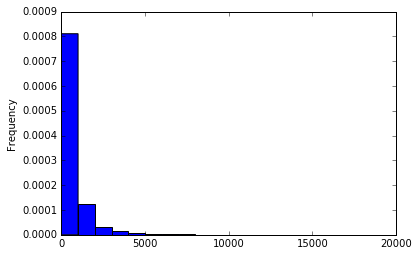

In [342]:
intervalo_renda = np.arange(0, 20000, 1000)
renda2011 = renda2011.fillna(0)
histograma3 = renda2011.plot.hist(bins=intervalo_renda, normed=1)

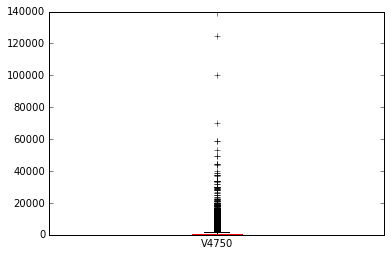

In [343]:
renda2011 = renda2011[(renda2011 <1000000)]
renda2011.plot.box()

In [344]:
renda2011.describe()

count    340572.000000
mean        742.708396
std        1225.777873
min           0.000000
25%         233.000000
50%         447.000000
75%         800.000000
max      125000.000000
Name: V4750, dtype: float64

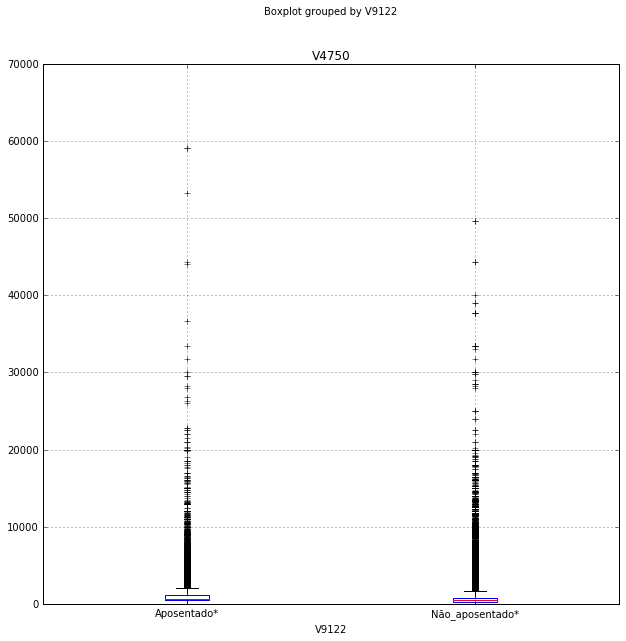

In [345]:
dados2011[dados2011.V4750 <82000].boxplot(column= "V4750", by="V9122", figsize=(10,10))

In [346]:
rendaf2011 = dados2011[(dados2011.V9122 == 'Aposentado*') & (renda2011)]
#rendaaposentados = dados.V9122[(renda)]
rendaaposentados2011 = rendaf2011.V4750

In [347]:
rendaaposentados2011.describe()

count    32869.000000
mean      1136.655329
std       1711.003622
min         49.000000
25%        515.000000
50%        640.000000
75%       1122.000000
max      59100.000000
Name: V4750, dtype: float64